<b><center>Go to <a href="https://finance.yahoo.com">finance.yahoo.com</a> and find stock symbols for your stocks and substitute in s1 and s2 below and run all cells<br><br>
E.g. Nestlé India Limited -> NESTLEIND.NS</center></b>

In [1]:
s1 = "TATASTEEL.NS"
s2 = "CIPLA.NS"

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.0 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=033e5c9d86745494f4bef94a958b776c73323a65638097a534ca435fde1cc712
  Stored in directory: /home/jovyan/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import yfinance as yf

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

### <b>C1</b>

In [4]:
nifty = yf.download("^NSEI", start="2016-12-03", end="2021-12-01", group_by="ticker", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [5]:
stock1 = yf.download(s1, start="2016-12-03", end="2021-12-01", group_by="ticker", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [6]:
stock2 = yf.download(s2, start="2016-12-03", end="2021-12-01", group_by="ticker", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [7]:
nifty['Change']=nifty['Adj Close'].pct_change()
stock1['Change']=stock1['Adj Close'].pct_change()
stock2['Change']=stock2['Adj Close'].pct_change()

In [8]:
nifty.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
stock1.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
stock1.drop(stock1[stock1.index.day != 1].index, inplace=True)
stock2.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
stock2.drop(stock2[stock2.index.day != 1].index, inplace=True)

In [27]:
x=nifty.join(stock1.join(stock2, lsuffix='TATASTEEL'), lsuffix='NIFTY')
x.rename(columns = {'Adj CloseNIFTY':'NIFTY_AdjClose','ChangeNIFTY':'NIFTY_Change %','Adj CloseTATASTEEL':'TATASTEEL_AdjClose','ChangeTATASTEEL':'TATASTEEL_Change %','Adj Close':'CIPLA_AdjClose','Change':'CIPLA_Change %'}, inplace=True)

In [28]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
x['NIFTY_Change %']=100*x['NIFTY_Change %']
x['TATASTEEL_Change %']=100*x['TATASTEEL_Change %']
x['CIPLA_Change %']=100*x['CIPLA_Change %']
x = x.round(2)
x

,NIFTY_AdjClose,NIFTY_Change %,TATASTEEL_AdjClose,TATASTEEL_Change %,CIPLA_AdjClose,CIPLA_Change %
Date,,,,,,
2016-12-01,8185.80,NaN,334.31,NaN,556.27,NaN
2017-01-01,8561.30,4.59,395.66,18.35,562.68,1.15
2017-02-01,8879.60,3.72,412.45,4.24,570.84,1.45
2017-03-01,9173.75,3.31,412.45,0.00,579.89,1.58
2017-04-01,9304.05,1.42,383.87,-6.93,545.17,-5.99
2017-05-01,9621.25,3.41,431.25,12.34,504.98,-7.37
2017-06-01,9520.90,-1.04,466.33,8.13,543.36,7.60
2017-07-01,10077.10,5.84,484.57,3.91,547.76,0.81
2017-08-01,9917.90,-1.58,554.91,14.52,561.29,2.47


In [ ]:
stock2.head()

,Adj Close,Change
Date,,
2017-01-01,523.549988,NaN
2017-02-01,456.750000,-0.127590
2017-03-01,465.850006,0.019923
2017-04-01,458.899994,-0.014919
2017-05-01,476.149994,0.037590


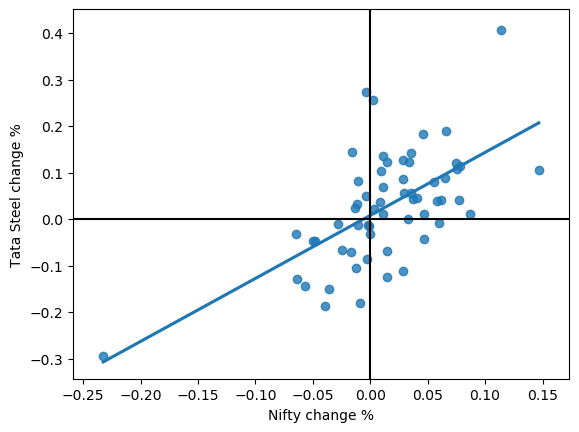

In [9]:
sns.regplot(x = nifty.Change,y = stock1.Change, ci=None)
plt.axvline(x=0,c='Black');plt.axhline(y=0,c='Black')
plt.xlabel("Nifty change %");plt.ylabel("Tata Steel change %");
plt.show()

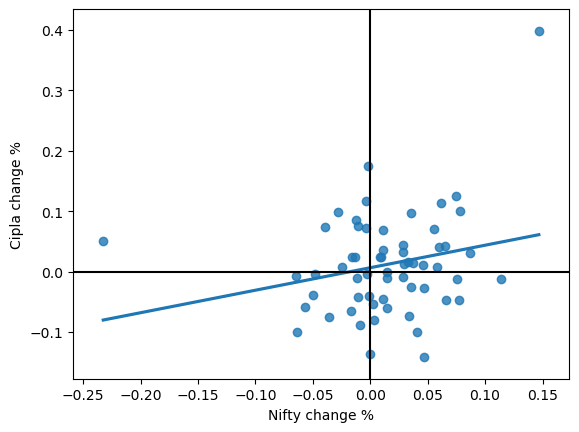

In [10]:
sns.regplot(x = nifty.Change,y = stock2.Change, ci=None)
plt.axvline(x=0,c='Black');plt.axhline(y=0,c='Black')
plt.xlabel("Nifty change %");plt.ylabel("Cipla change %");
plt.show()

### <b>C2</b>

#### Nifty

In [11]:
nifty_var = 12*nifty.Change.var()
nifty_return = 12*nifty.Change.mean()
print("Annual Variance - {} or {:.2f}%".format(nifty_var,nifty_var*100))
print("Nifty Return - {:.2f}%".format(nifty_return*100))

Annual Variance - 0.034767906284780735 or 3.48%
Nifty Return - 16.69%


#### Stock1

In [12]:
stock1_var=12*stock1.Change.var()
stock1_Beta = LinearRegression().fit(np.array(nifty.Change[1:]).reshape(-1,1), np.array(stock1.Change[1:])).coef_[0]
sys_risk = nifty_var*stock1_Beta**2
unsys_risk = stock1_var-sys_risk
print("Annual Variance/Total Risk - {:.8f} or {:.2f}%".format(stock1_var,stock1_var*100))
print("Beta                       - {:.8f}".format(stock1_Beta))
print("Systematic Risk            - {:.8f} or {:.2f}%".format(sys_risk,sys_risk*100))
print("Unsystematic Risk          - {:.8f} or {:.2f}%".format(unsys_risk,unsys_risk*100))

Annual Variance/Total Risk - 0.17038792 or 17.04%
Beta                       - 1.35525073
Systematic Risk            - 0.06385837 or 6.39%
Unsystematic Risk          - 0.10652955 or 10.65%


#### Stock 2

In [13]:
stock2_var=12*stock2.Change.var()
stock2_Beta = LinearRegression().fit(np.array(nifty.Change[1:]).reshape(-1,1), np.array(stock2.Change[1:])).coef_[0]
sys_risk = nifty_var*stock2_Beta**2
unsys_risk = stock2_var-sys_risk
print("Annual Variance/Total Risk - {:.8f} or {:.2f}%".format(stock2_var,stock2_var*100))
print("Beta                       - {:.8f}".format(stock2_Beta))
print("Systematic Risk            - {:.8f} or {:.2f}%".format(sys_risk,sys_risk*100))
print("Unsystematic Risk          - {:.8f} or {:.2f}%".format(unsys_risk,unsys_risk*100))

Annual Variance/Total Risk - 0.08351966 or 8.35%
Beta                       - 0.37257763
Systematic Risk            - 0.00482628 or 0.48%
Unsystematic Risk          - 0.07869338 or 7.87%


### <b>C3</b>

In [14]:
rf = 0.06
expected_return_stock1 = rf+stock1_Beta*(nifty_return-rf)
expected_return_stock2 = rf+stock2_Beta*(nifty_return-rf)
print("Expected return of Stock 1 using CAPM Model - {:.2f}%".format(100*expected_return_stock1))
print("Actual return of Stock 1                    - {:.2f}%".format(12*100*stock1.Change.mean()))
print("Expected return of Stock 2 using CAPM Model - {:.2f}%".format(100*expected_return_stock2))
print("Actual return of Stock 2                    - {:.2f}%".format(12*100*stock2.Change.mean()))

Expected return of Stock 1 using CAPM Model - 20.49%
Actual return of Stock 1                    - 31.95%
Expected return of Stock 2 using CAPM Model - 9.98%
Actual return of Stock 2                    - 14.08%
